In [70]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
# Visualize the decision regions of classifier
# A function for plotting decision regions of classifiers in 1 or 2 dimensions.

In [71]:
df = pd.DataFrame()

In [72]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]
# Classification problem

In [73]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

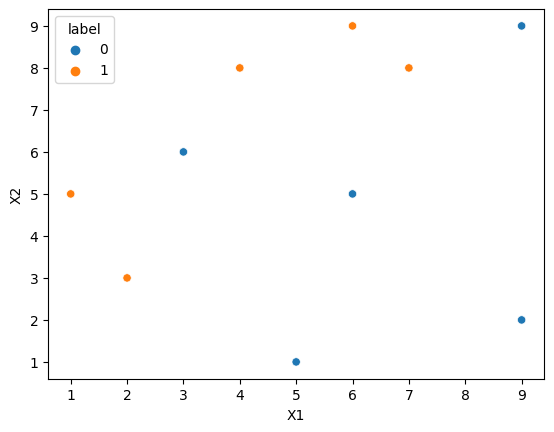

In [74]:
import seaborn as sns
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])
# Non-linear data

In [75]:
# Step-1: First assign same weight to each row
df['weights'] = 1/df.shape[0]

In [76]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
# Max depth=1. Adaboost use decision stumps.
dt1 = DecisionTreeClassifier(max_depth=1)

In [79]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [80]:
# step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

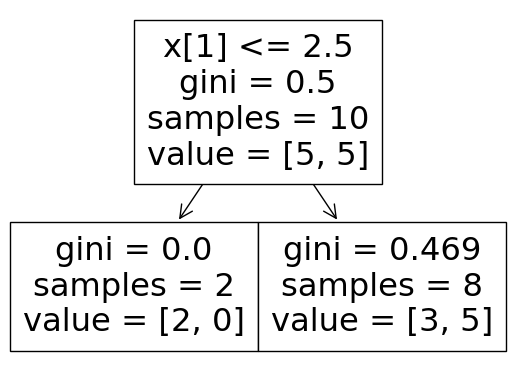

In [81]:
from sklearn.tree import plot_tree
plot_tree(dt1)
# decision stump

<Axes: >

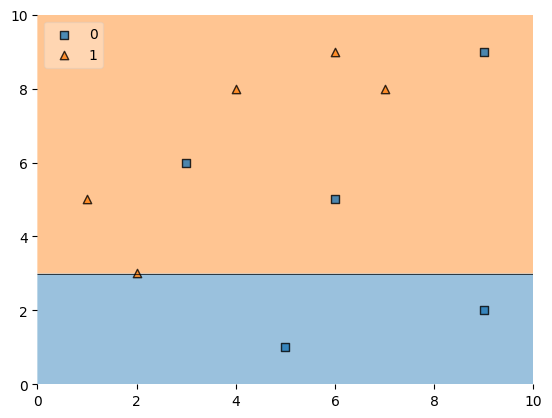

In [82]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [84]:
df['y_pred'] = dt1.predict(X)

In [85]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


Here in predict column model is making three mistakes i.e in row no.2,6,8.

In [86]:
# Calculate weightage of above decision stump / first model
# error = Sum of weight of all those rows who were misclassified, here 0.1 + 0.1 + 0.1 = 0.3
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

In [87]:
# step3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [88]:
# step4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [89]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
# apply more weight to wrongly predicted rows & less weight to correctly predicted row.
# To pass this weight to next model for further reference of wrongly predicted values/ next model consider previous models error

In [90]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [91]:
df['updated_weights'].sum()
# here sum of weight should be 1

0.9165153319682015

In [92]:
# to normalized the weights
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [93]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [94]:
df['normalized_weights'].sum()
# weights are normalized

1.0

In [95]:
# to create upper and lower range using weights (by adding weights from zero)
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [96]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [97]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [98]:
def create_new_dataset(df):

  indices = []
  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [99]:
# Repeat process for 2nd model. Create 2nd dataset
index_values = create_new_dataset(df)
index_values
# upsampling = weight of rows who made errors increases

[6, 6, 2, 0, 2, 2, 8, 6, 3, 8]

In [100]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [101]:
second_df

,X1,X2,label,weights
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
0,1,5,1,0.1
2,3,6,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1


In [102]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [103]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [104]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]')]

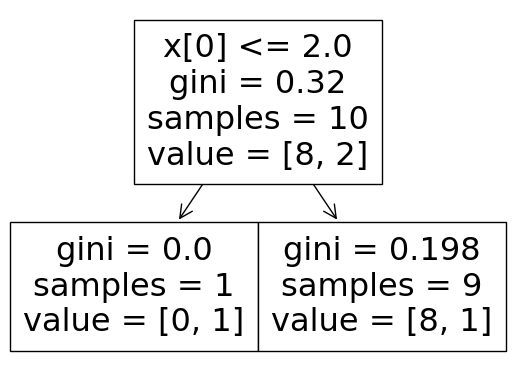

In [105]:
plot_tree(dt2)

<Axes: >

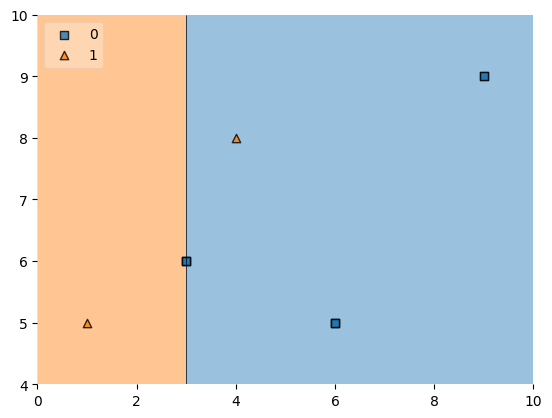

In [106]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [107]:
second_df['y_pred'] = dt2.predict(X)

In [108]:
second_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
0,1,5,1,0.1,1
2,3,6,0,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,0
6,6,5,0,0.1,0
3,4,8,1,0.1,0
8,9,9,0,0.1,0


In [109]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [110]:
# step4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [111]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [112]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
6,6,5,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
3,4,8,1,0.1,0,0.297427
8,9,9,0,0.1,0,0.033622


In [113]:
second_df['updated_weights'].sum()

0.6000222515923666

In [114]:
# to normalized the weights
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [115]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
6,6,5,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,0,0.297427,0.495694
8,9,9,0,0.1,0,0.033622,0.056034


In [116]:
second_df['normalized_weights'].sum()
# weights are normalized

1.0

In [117]:
# to create upper and lower range using weights (by adding weights from zero)
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [118]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [119]:
second_df[['X1','X2','label','weights','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,normalized_weights,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0,0.056034,0.000000,0.056034
6,6,5,0,0.1,0,0.056034,0.056034,0.112068
2,3,6,0,0.1,0,0.056034,0.112068,0.168102
0,1,5,1,0.1,1,0.056034,0.168102,0.224136
2,3,6,0,0.1,0,0.056034,0.224136,0.280170
2,3,6,0,0.1,0,0.056034,0.280170,0.336204
8,9,9,0,0.1,0,0.056034,0.336204,0.392238
6,6,5,0,0.1,0,0.056034,0.392238,0.448272
3,4,8,1,0.1,0,0.495694,0.448272,0.943966
8,9,9,0,0.1,0,0.056034,0.943966,1.000000


In [120]:
index_values = create_new_dataset(second_df)
index_values

[2, 3, 2, 6, 6, 3, 8, 6, 6, 3]

In [121]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [122]:
third_df

,X1,X2,label,weights
2,3,6,0,0.1
0,1,5,1,0.1
2,3,6,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
0,1,5,1,0.1
3,4,8,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
0,1,5,1,0.1


In [123]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

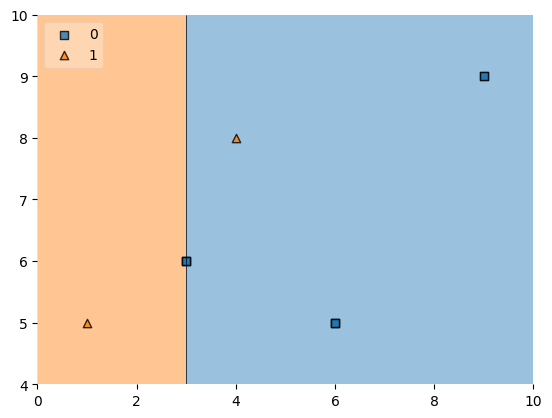

In [124]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [125]:
third_df['y_pred'] = dt3.predict(X)

In [126]:
third_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
0,1,5,1,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,1
8,9,9,0,0.1,0
0,1,5,1,0.1,0
3,4,8,1,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
0,1,5,1,0.1,0


In [127]:
alpha3 = calculate_model_weight(0.5)
alpha3

0.0

In [128]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 0.0


# Prediction

In [129]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [130]:
dt2.predict(query)

array([1])

In [131]:
dt3.predict(query)

array([1])

In [132]:
alpha1*(1) + alpha2*(1) + alpha3*(1)

1.5222612188617117

In [133]:
np.sign(1.52)
# predicted correctly

1.0

In [134]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [135]:
dt2.predict(query)

array([0])

In [136]:
dt3.predict(query)

array([0])

In [137]:
# in boosting consider 0 as -1
alpha1*(1)+alpha2*(-1)+alpha3*(-1)

-0.674963358474508

In [139]:
np.sign(-0.67)

-1.0

That is how the algorithm works. I have taken 3 decision stump shere. But You can also take 100, 200, etc. decision stumps.